In [3]:
# Importar librerías necesarias
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [4]:
'''
  Regresa el modelo que será utilizado para la clasificación, en este caso, se utilizan las
  técnicas de la lista model_names. Esta función no tiene un parámetro de entrada.
'''
def getModel(model_name):
    if model_name == 'RandomForest':
        return RandomForestClassifier(n_estimators=100, max_depth=10, max_features=None, random_state=123)
    elif model_name == 'LogisticRegression':
        return LogisticRegression(random_state=123)
    elif model_name == 'SVM':
        return SVC(kernel='linear', random_state=123)
    elif model_name == 'KNeighbors':
        return KNeighborsClassifier()
    elif model_name == 'GradientBoosting':
        return GradientBoostingClassifier(random_state=123)
    elif model_name == 'AdaBoost':
        return AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=123)


In [5]:
'''
  Esta función permite probar el desempeño del modelo de clasificación con los valores separados
  de prueba. Para esto se muestra en la terminal el puntaje de precisión obtenido con la librería
  sklearn, además de una matriz de confusión comparando las predicciones y clases reales.
'''
def show_test_results(model, data_x_test, data_y_test):
    predictions = model.predict(data_x_test)
    print(f'{model.__class__.__name__} accuracy score:', accuracy_score(data_y_test, predictions))

    # Generamos una matriz de confusión con las clases reales y predecidas
    # 0: Sin riesgo de hipertensión
    # 1: Riesgo de Hipertensión
    cm = confusion_matrix(data_y_test, predictions, labels=[0, 1])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cm_display.plot()

    # Guardamos el resultado en formato png
    img_file_name = 'test_results_{date:%Y-%m-%d_%H-%M-%S}.png'.format(date=datetime.datetime.now())
    img_save_path = os.path.join('result_images', img_file_name)
    plt.savefig(img_save_path)

    plt.show()

In [6]:
# Carga de datos
data_path = os.path.join('data', 'Hipertension_Arterial_Mexico.csv')
data = pd.read_csv(data_path)

# Eliminamos la columna con el folio debido a que es un identificador, 
# no será utilizado para el análisis
data = data.drop(['FOLIO_I'], axis=1)

In [7]:
# Se divide el dataset en datos de entrenamiento (85%) y de prueba (15%)
data_train, data_test = train_test_split(data, test_size=0.15, random_state=123)

In [8]:
# Separamos nuestras variables dependientes e independientes de ambos conjuntos
data_x_train = data_train.drop(['riesgo_hipertension'], axis=1)
data_y_train = data_train[['riesgo_hipertension']]

data_x_test = data_test.drop(['riesgo_hipertension'], axis=1)
data_y_test = data_test[['riesgo_hipertension']]

In [9]:
# Se aplica el escalado sobre los datos
scaler = MinMaxScaler()
scaler.fit(data_x_train)

data_x_train_scaled = scaler.transform(data_x_train)
data_x_train = pd.DataFrame(data_x_train_scaled) # Ajustamos el escalado únicamente con los valores de entrenamiento

data_x_test_scaled = scaler.transform(data_x_test)
data_x_test = pd.DataFrame(data_x_test_scaled)

In [10]:
# Lista de modelos a probar
model_names = ['RandomForest', 'LogisticRegression', 'SVM', 'KNeighbors', 'GradientBoosting', 'AdaBoost']

RandomForestClassifier accuracy score: 0.9938931297709923


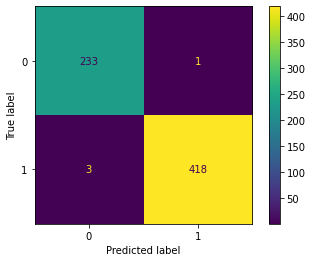

LogisticRegression accuracy score: 0.8396946564885496


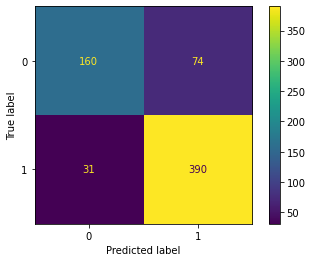

SVC accuracy score: 0.8519083969465648


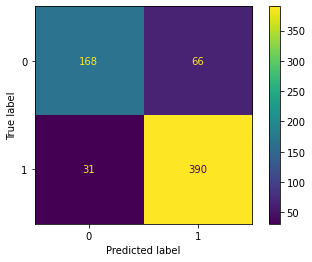

KNeighborsClassifier accuracy score: 0.8473282442748091


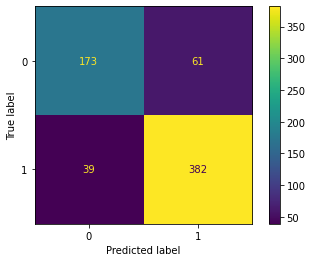

GradientBoostingClassifier accuracy score: 0.9954198473282443


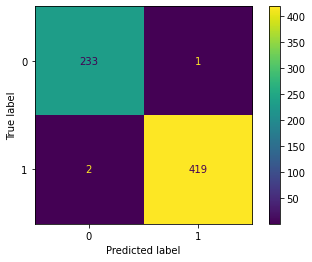

AdaBoostClassifier accuracy score: 0.9862595419847329


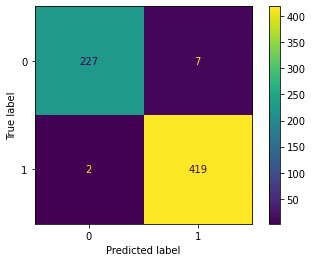

In [11]:
# Iterar sobre el entrenamiento de los modelos
for model_name in model_names:
    model = getModel(model_name)
    model.fit(data_x_train, data_y_train.values.ravel())
    show_test_results(model, data_x_test, data_y_test)